## Support Vector Regression

In [ ]:
#  Support vector regressor (SVR) is a type of machine learning algorithm that is used for regression 
#  tasks. It is a variant of support vector machines (SVMs), which are a type of linear model that 
#  is used for classification tasks.

#  The basic idea of SVR is to find the hyperplane in the feature space that maximizes the margin 
#  between the predicted values of the response variable and the observed values of the 
#  response variable in the training data. The margin is defined as the distance between 
#  the hyperplane and the nearest data points in the training set. 
#  Maximizing the margin allows the model to make more accurate predictions by reducing 
#  the influence of noise in the training data.

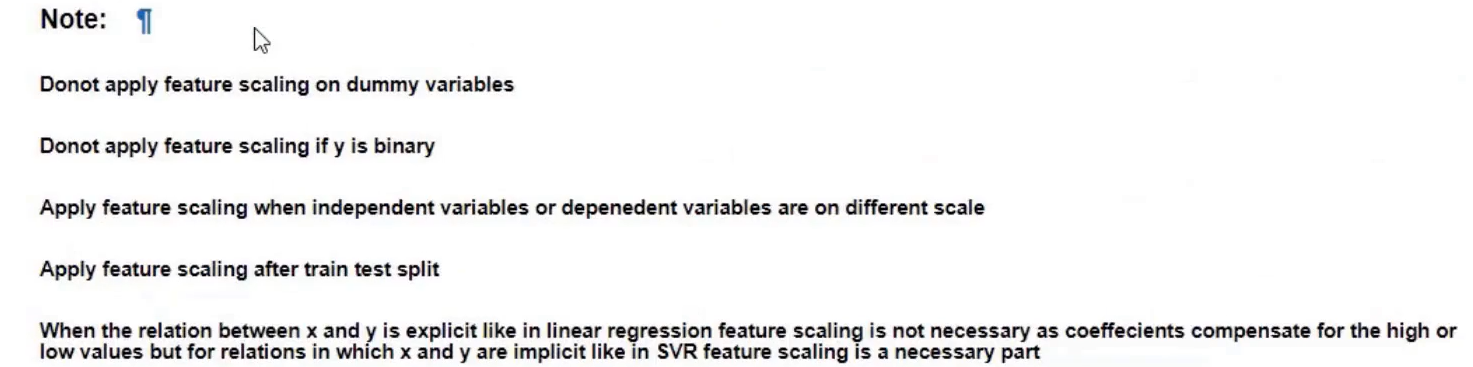

In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
dataset = pd.read_csv(r'C:\Users\Admin\Datasets\Position_Salaries.csv')

In [52]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [53]:
# we wepare x and y here

In [54]:
x = dataset.iloc[: , 1:-1].values
y = dataset.iloc[: , -1 ].values

In [55]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [56]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [57]:
# change y into 2D array

In [58]:
y = y.reshape(len(y),1)

In [59]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [60]:
# Now x and y are in the form of 2D array, we input them in 'Standard Scalar' class

In [61]:
# Standardize Feauture Scaling

In [62]:
# Our dataset here is very short, we are not looking at train test split,
# We will just perform training

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
# We will make two objects of Standard Scaler class
sc_x = StandardScaler()
sc_y = StandardScaler()

In [65]:
# Its calculate mean and Standard deviation
x = sc_x.fit_transform(x) 
y = sc_y.fit_transform(y)

In [66]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [67]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [68]:
# Both x and y scale are changed and both are in the similar scale now

In [69]:
# Create our model

In [70]:
from sklearn.svm import SVR

In [71]:
regressor = SVR(kernel = 'rbf')   # Radial basis function (RBF). It is a non linear kernel
regressor.fit(x,y)

# Kernel is the most important feature. 
# There are many types of kernels – linear, Gaussian, etc. 
# Each is used depending on the dataset.

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

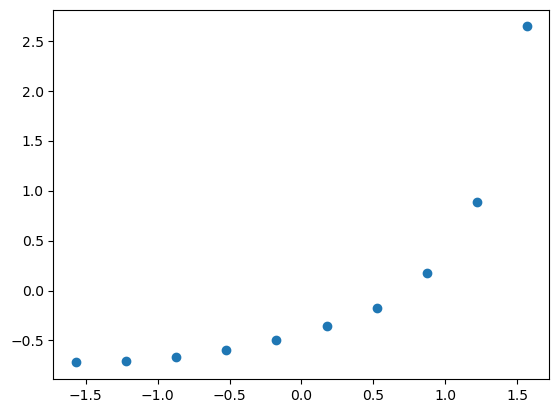

In [72]:
plt.scatter(x,y)
plt.show()

In [73]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

In [74]:
y_pred

array([[170370.0204065]])

In [75]:
dataset  # just for checking 6.5 Level we are almot there 170370.020

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [76]:
# Now we are doing plotting to check how our model has fit our plotting

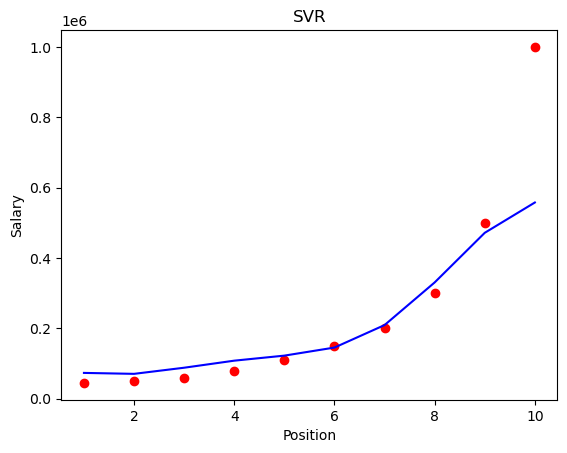

In [85]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color ='blue')
plt.title('SVR')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()